 Accuracy: 0.772093023255814
 Precision: 0.7707953978680058
 Recall: 0.772093023255814
 F1 Score: 0.7710165637718555

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       126
           1       0.74      0.70      0.72        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



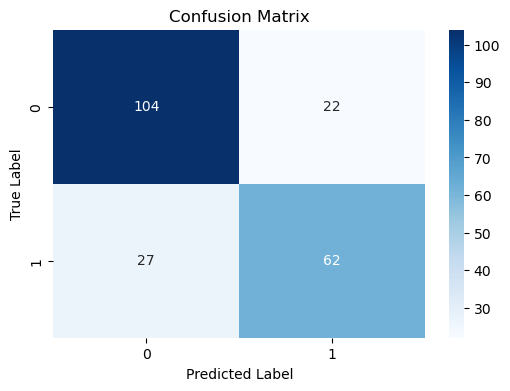

In [3]:
# Project Title : Model Evaluation using Logistic Regression
# Author        : Shama P S
# Description   : This project demonstrates the evaluation of a Logistic 
#                 Regression model using classification metrics. 
#                 It covers data preprocessing, model training, prediction, 
#                 and evaluation using accuracy, precision, recall, 
#                 F1-score, confusion matrix, and classification report. 
#                 Visualization is done using seaborn and matplotlib.
#
# Tools Used    : Python, NumPy, Pandas, Scikit-learn, Matplotlib, Seaborn
# Dataset Source: Iris dataset from scikit-learn (can be replaced with any CSV dataset)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# Step 1: Load Your Dataset
# =========================
# Option 1: Load from CSV (Uncomment and replace with your file)
# data = pd.read_csv("your_dataset.csv")

# Example: Titanic dataset from seaborn
import seaborn as sns
data = sns.load_dataset("titanic").dropna(subset=["age", "sex", "class", "survived"])

# Features (X) and Target (y)
X = pd.get_dummies(data[["age", "sex", "class"]], drop_first=True)  # convert categorical → numeric
y = data["survived"]   # target variable

# =========================
# Step 2: Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =========================
# Step 3: Train a Model
# =========================
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# =========================
# Step 4: Predictions
# =========================
y_pred = model.predict(X_test)

# =========================
# Step 5: Evaluation Metrics
# =========================
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred, average='weighted'))
print(" Recall:", recall_score(y_test, y_pred, average='weighted'))
print(" F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# =========================
# Step 6: Classification Report
# =========================
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# =========================
# Step 7: Confusion Matrix Visualization
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()